# Table of Contents
* [GENRE DISTRIBUTION](#s1)
* [I. USERS' DEMOGRAPHIC DATA AND RATINGS](#s2)
     * [1. Ratings](#ss2-1)
        * [Movie average rating](#sss2-1-1)   
        * [Movie rating standard deviation](#sss2-1-2) 
     * [2. Gender of Users](#ss2-2)
     * [3. Age of Users](#ss2-3)
     * [4. Occupation of Users](#ss2-4)
     * [5. Train](#ss2-5)
         * [5.1. Random Forest](#sss2-5-1)
         * [5.2. Neural Network](#sss2-5-2)
* [II. MOVIE TITLES](#s3)
     * [1. Preprocessing](#ss3-1)
     * [2. Analyze](#ss3-2)
     * [3. Train](#ss3-3)
         * [3.1. TF-IDF](#sss3-3-1)
             * [a. Naive Bayes](#ssss3-3-1-a)
             * [b. SVM](#ssss3-3-1-b)
             * [c. Random Forest](#ssss3-3-1-c)
         * [3.2. Neural Network (LSTM)](#sss3-2-2)
* [III. MOVIE POSTERS](#s4)
     * [1. Preprocessing](#ss4-1)
     * [2. Analyze](#ss4-2)
     * [3. Data Augmentation](#ss4-3)
     * [4. Train](#ss4-4)
         * [CNN Model (Resnet50)](#sss4-4-1)
* [IV. COMBINE](#s5)
    * [1. Use mean value](#ss5-1)
    * [2. Create new model](#ss5-2)
* [V. RESULT](#s6)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!pip install gdown

In [3]:
!gdown 1hUqu1mbFeTEfBvl-7fc56fHFfCSzIktD

Downloading...
From (uriginal): https://drive.google.com/uc?id=1hUqu1mbFeTEfBvl-7fc56fHFfCSzIktD
From (redirected): https://drive.google.com/uc?id=1hUqu1mbFeTEfBvl-7fc56fHFfCSzIktD&confirm=t&uuid=292bc700-3ba3-4454-9e47-e1174d4f1b8b
To: /kaggle/working/ml1m.zip
100%|█████████████████████████████████████████| 105M/105M [00:00<00:00, 162MB/s]


In [4]:
!unzip -qq ml1m.zip -d ml1m

In [3]:
# You need extract file ml1m.zip to folder ml1m before run code

users = pd.read_csv('ml1m/content/dataset/users.dat', sep='::',
                        engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip']).set_index('userid')
ratings = pd.read_csv('ml1m/content/dataset/ratings.dat', engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])
movies_train = pd.read_csv('ml1m/content/dataset/movies_train.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')
movies_test = pd.read_csv('ml1m/content/dataset/movies_test.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')
movies_train['genre'] = movies_train.genre.str.split('|')
movies_test['genre'] = movies_test.genre.str.split('|')

users.age = users.age.astype('category')
users.gender = users.gender.astype('category')
users.occupation = users.occupation.astype('category')
ratings.movieid = ratings.movieid.astype('category')
ratings.userid = ratings.userid.astype('category')

In [ ]:
folder_img_path = 'ml1m/content/dataset/ml1m-images'

In [7]:
import os

In [8]:
movies_train['id'] = movies_train.index
movies_train.reset_index(inplace=True)
movies_train['img_path'] = movies_train.apply(lambda row: os.path.join(folder_img_path, f'{row.id}.jpg'), axis = 1)

movies_test['id'] = movies_test.index
movies_test.reset_index(inplace=True)
movies_test['img_path'] = movies_test.apply(lambda row: os.path.join(folder_img_path, f'{row.id}.jpg'), axis = 1)


In [9]:
movies_train

,movieid,title,genre,id,img_path
0,1650,Washington Square (1997),[Drama],1650,ml1m/content/dataset/ml1m-images/1650.jpg
1,185,"Net, The (1995)","[Sci-Fi, Thriller]",185,ml1m/content/dataset/ml1m-images/185.jpg
2,1377,Batman Returns (1992),"[Action, Adventure, Comedy, Crime]",1377,ml1m/content/dataset/ml1m-images/1377.jpg
3,3204,"Boys from Brazil, The (1978)",[Thriller],3204,ml1m/content/dataset/ml1m-images/3204.jpg
4,1901,Dear Jesse (1997),[Documentary],1901,ml1m/content/dataset/ml1m-images/1901.jpg
...,...,...,...,...,...
3101,2539,Analyze This (1999),[Comedy],2539,ml1m/content/dataset/ml1m-images/2539.jpg
3102,3038,"Face in the Crowd, A (1957)",[Drama],3038,ml1m/content/dataset/ml1m-images/3038.jpg
3103,1832,Heaven's Burning (1997),"[Action, Drama]",1832,ml1m/content/dataset/ml1m-images/1832.jpg
3104,657,Yankee Zulu (1994),"[Comedy, Drama]",657,ml1m/content/dataset/ml1m-images/657.jpg


In [4]:
users

,gender,age,occupation,zip
userid,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [5]:
ratings

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [10]:
train_index = movies_train['movieid']
test_index = movies_test['movieid']

In [11]:
movies_merged = pd.concat([movies_train, movies_test], axis=0)

In [12]:
genres_encoded = movies_merged['genre'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

movies_merged = pd.concat([movies_merged, genres_encoded], axis=1)

In [13]:
movies_merged.drop(columns = ['title','genre'],inplace=True)

In [14]:
all_movieid = movies_merged['movieid']

In [15]:
genre_columns = genres_encoded.columns
genre_columns = sorted(genre_columns)

<a id="s1" ></a>
# GENRE DISTRIBUTION

In [16]:
genre_counts = movies_merged[genre_columns].sum().sort_values(ascending=False)

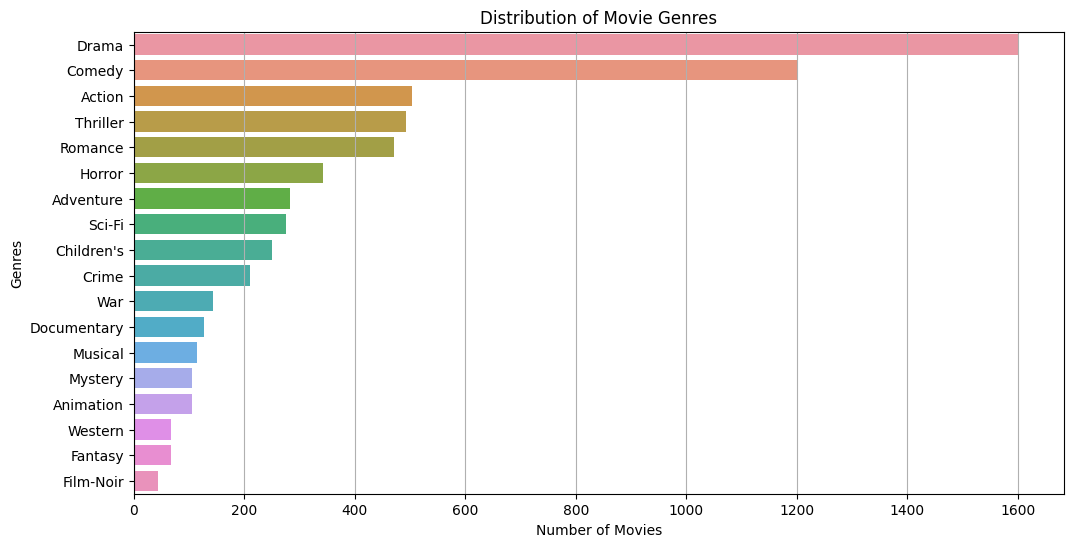

In [17]:
# Plotting the genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.grid(axis='x')

- Imbalanced Dataset: The dataset is imbalanced with respect to the number of movies across genres. Comedy and Drama have significantly more samples compared to other genres like Film-Noir and Fantasy. This could affect the performance of a classifier, as it might become biased towards the genres with more data.

<a id="s2" ></a>
# I. USERS' DEMOGRAPHIC DATA AND RATINGS

In [18]:
# First, merge the ratings with the users dataset
ratings_users = pd.merge(ratings, users, on='userid')

In [19]:
ratings_users.drop(columns = [ 'timestamp','zip','userid'],inplace=True)

In [20]:
merged_data = pd.merge(ratings_users, movies_merged, on='movieid')

<a id="ss2-1" ></a>
## 1. Ratings

In [21]:
rating_distribution = ratings_users['rating'].value_counts().sort_index()

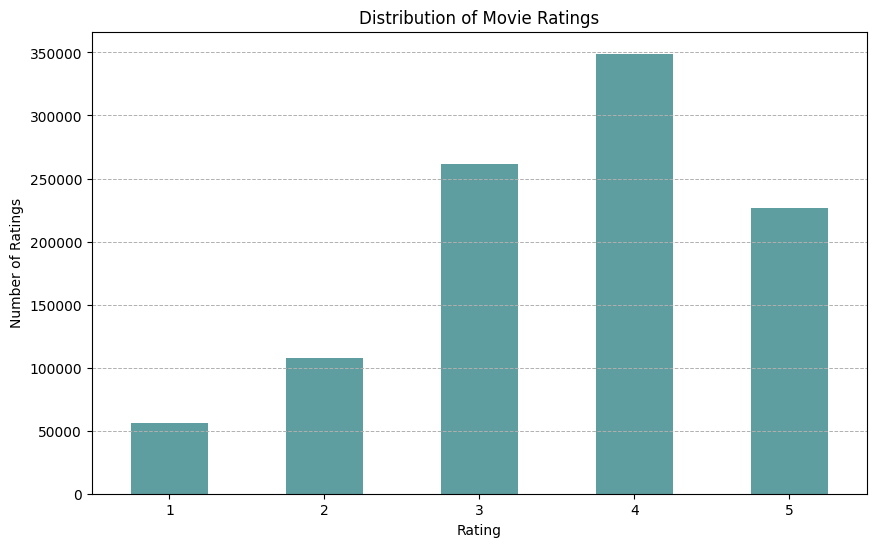

In [22]:

# Plotting the distribution of ratings as a bar chart
plt.figure(figsize=(10, 6))
rating_distribution.plot(kind='bar', color='cadetblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

* The distribution is not uniform and shows that there are more moderate to positive ratings (3, 4, and 5) than negative (1 and 2).
* A possible interpretation is that users are more likely to rate movies they feel positively about, or it could suggest that there are simply more average to good movies than poor ones in this dataset.
* The high number for rating 3 and 4 could also indicate that users tend to select a neutral or not the best option when they are unsure.

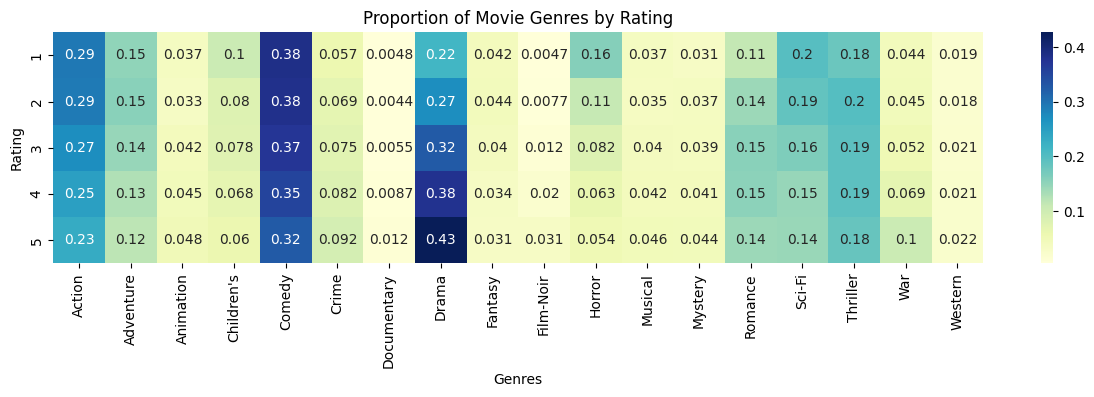

In [23]:
#Genre preferences by gender
genre_by_rating = merged_data.groupby('rating')[genre_columns].mean()

plt.figure(figsize=(15, 3))
sns.heatmap(genre_by_rating, annot=True, cmap="YlGnBu")
plt.title('Proportion of Movie Genres by Rating')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.show()

* Genres traditionally associated with critical acclaim (Drama, Comedy, Romance, Action) tend to have higher proportions in higher-rated movies.
* Genres often associated with mass entertainment (Action, Sci-Fi, Thriller) do not show a significant increase with higher ratings.
* Less common genres (Documentary, Film-Noir, Western, Fantasy) maintain a low proportion across all ratings.

In [24]:
film_rating_counts = merged_data.groupby(['movieid', 'rating']).size().unstack(fill_value=0)
rating_df = pd.DataFrame(film_rating_counts.to_records())
rating_df.columns = ['movieid', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']


<a id="sss2-1-1" ></a>
### Movie average rating

In [25]:
movie_average_ratings_df = ratings_users.groupby('movieid')['rating'].mean().reset_index()
movie_average_ratings_df.rename(columns={'rating': 'movie_avg_rating'}, inplace=True)

/tmp/ipykernel_25/4060048171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_average_ratings_df = ratings_users.groupby('movieid')['rating'].mean().reset_index()


/tmp/ipykernel_25/2215613039.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=movie_average_ratings_df, x="movie_avg_rating", shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


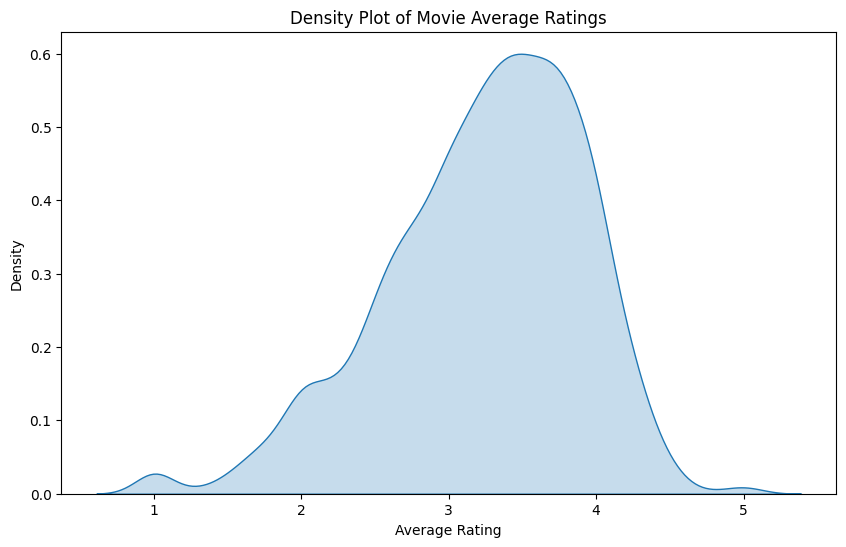

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=movie_average_ratings_df, x="movie_avg_rating", shade=True)
plt.title('Density Plot of Movie Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.show()

*  Most movies have above average ratings

In [27]:
movie_average_ratings_df.shape

(3706, 2)

<a id="sss2-1-2" ></a>
### Movie rating standard deviation

In [28]:
movie_rating_std_dev_df = ratings_users.groupby('movieid')['rating'].std().reset_index()
movie_rating_std_dev_df.rename(columns={'rating': 'movie_rating_std_dev'}, inplace=True)

/tmp/ipykernel_25/1675329641.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_rating_std_dev_df = ratings_users.groupby('movieid')['rating'].std().reset_index()


/tmp/ipykernel_25/3162929783.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=movie_rating_std_dev_df, x="movie_rating_std_dev", shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


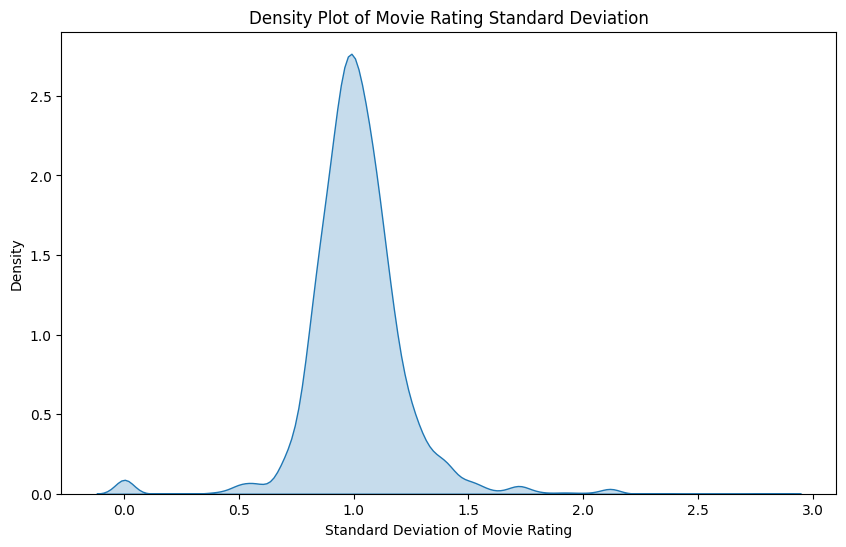

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=movie_rating_std_dev_df, x="movie_rating_std_dev", shade=True)
plt.title('Density Plot of Movie Rating Standard Deviation')
plt.xlabel('Standard Deviation of Movie Rating')
plt.ylabel('Density')
plt.show()

* Most movie ratings have a standard deviation clustered around a low value, meaning that the ratings from viewers do not vary widely. This could suggest that there is a general consensus in how movies are rated

In [30]:
movie_rating_std_dev_df.shape

(3706, 2)

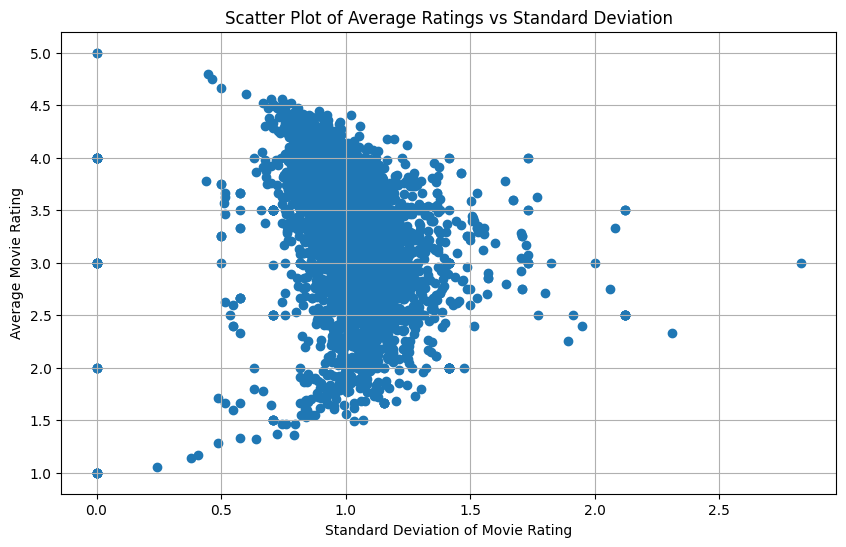

In [31]:
merged_rating_df = pd.merge(movie_rating_std_dev_df, movie_average_ratings_df, on='movieid')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_rating_df['movie_rating_std_dev'], merged_rating_df['movie_avg_rating'])
plt.title('Scatter Plot of Average Ratings vs Standard Deviation')
plt.ylabel('Average Movie Rating')
plt.xlabel('Standard Deviation of Movie Rating')
plt.grid(True)
plt.show()

<a id="ss2-2" ></a>
## 2. Gender of Users

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


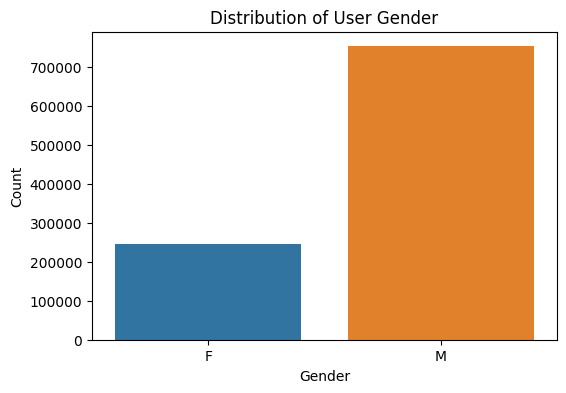

In [32]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=merged_data)
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- Imbalanced dataset: Mostly male viewers

/tmp/ipykernel_25/1690539743.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_by_gender = merged_data.groupby('gender')[genre_columns].mean()


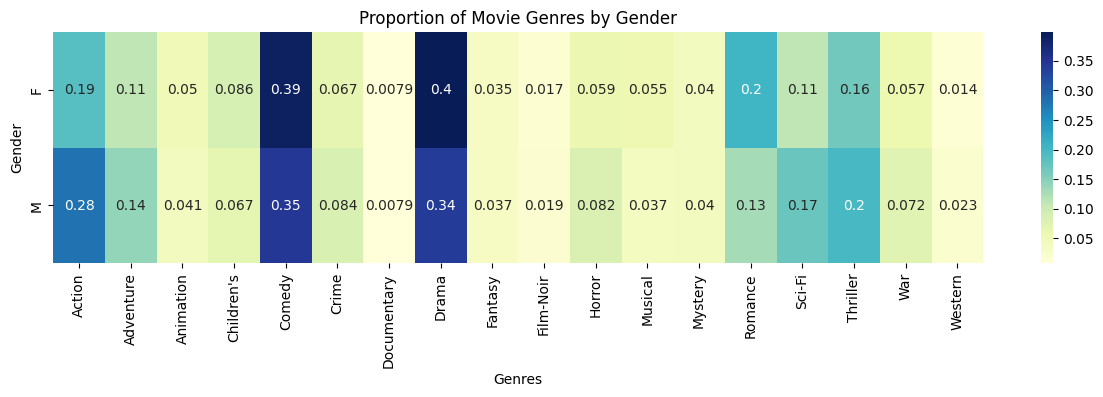

In [33]:
#Genre preferences by gender
genre_by_gender = merged_data.groupby('gender')[genre_columns].mean()

plt.figure(figsize=(15, 3))
sns.heatmap(genre_by_gender, annot=True, cmap="YlGnBu")
plt.title('Proportion of Movie Genres by Gender')
plt.xlabel('Genres')
plt.ylabel('Gender')
plt.show()

* Drama and Comedy are popular across both genders but slightly more so among females.
* Action, Adventure, Sci-Fi and Thriller genres also tend to be favored by male viewers.
* Romance shows a higher proportion of female viewership.
* Other genres have a relatively low viewership in comparison to other genres for both genders.

In [34]:
gender_counts = ratings_users.groupby(['movieid', 'gender']).size().unstack(fill_value=0)
gender_df = pd.DataFrame(gender_counts.to_records())

/tmp/ipykernel_25/1452382764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = ratings_users.groupby(['movieid', 'gender']).size().unstack(fill_value=0)


In [35]:
gender_df.shape

(3706, 3)

<a id="ss2-3" ></a>
## 3. Age of Users

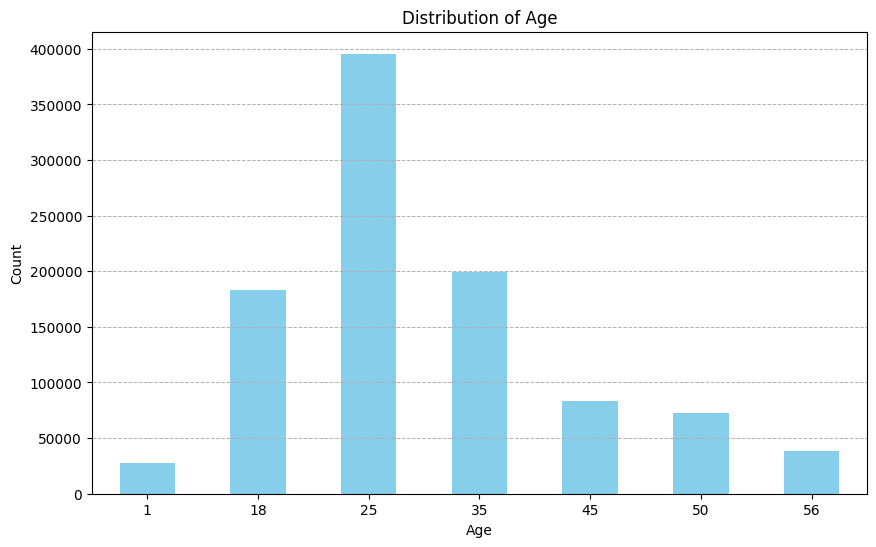

In [36]:
age_distribution = merged_data['age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

* Dominant Age Group: The age group around 25 years old is the most represented in the dataset
* Decreasing Representation with Increasing Age: There is a noticeable trend that as age increases, the representation in the dataset decreases after reaching the peak at 25.
* Significant Presence of Young Adults: The data shows a significant count at age 18, which is often associated with young adulthood and increased independence. This age may represent a key demographic for certain movie genre.
* Less Representation of Children: Very young ages, above 1 year old, have minimal representation. This could indicate that children are not the primary audience for the majority of movies in the dataset.

/tmp/ipykernel_25/3201380299.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_mean_by_age_group = merged_data.groupby('age')[genre_columns].mean()


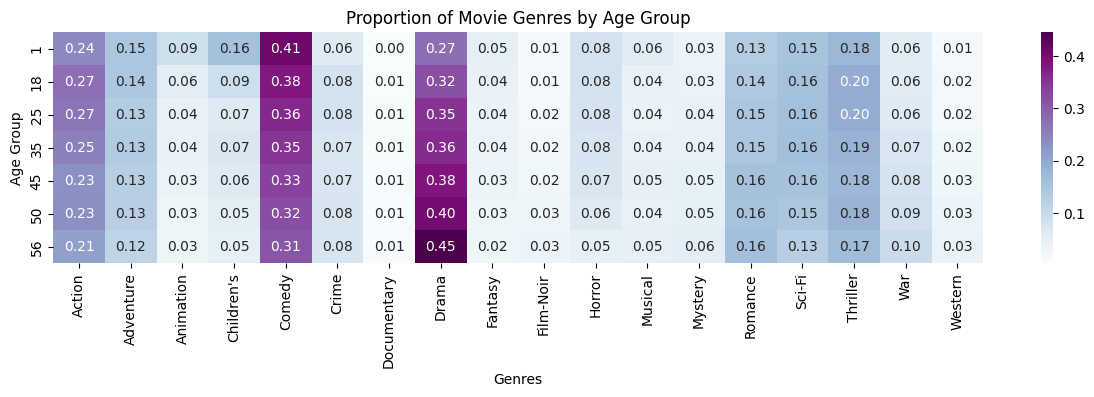

In [37]:
# Grouping the data by age group and calculating the mean for each genre
genre_mean_by_age_group = merged_data.groupby('age')[genre_columns].mean()

plt.figure(figsize=(15, 3))
sns.heatmap(genre_mean_by_age_group, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Proportion of Movie Genres by Age Group')
plt.xlabel('Genres')
plt.ylabel('Age Group')
plt.show()

* Drama: The preference for drama seems to increase with age.
* Comedy and Action: There's a high preference for comedy across all age groups, particularly notable in the younger groups.
* Sci-Fi,Thriller and Adventure: These genres show a moderate and relatively consistent preference across all age groups, with a small decrease as age increases.
* Romance: Interest in romance films is relatively consistent across age groups, with a slight increase with age.
* Children's and Animation: As expected, these genres are more popular among younger audiences and see a significant decrease in interest as age increases
* Crime, Documentary, Horror, War, Musical, Film Noir, Mystery, Western, and Fantasy: These genres have lower overall proportions across all age groups, with some variations. For instance, the interest in horror movies decreases with age, while interest in war movies seems to increase slightly.

In [38]:
age_counts = merged_data.groupby(['movieid', 'age']).size().unstack(fill_value=0)
age_df = pd.DataFrame(age_counts.to_records())

/tmp/ipykernel_25/215325067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = merged_data.groupby(['movieid', 'age']).size().unstack(fill_value=0)


In [39]:
age_df.shape

(3706, 8)

<a id="ss2-4" ></a>
## 4. Occupation of Users

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


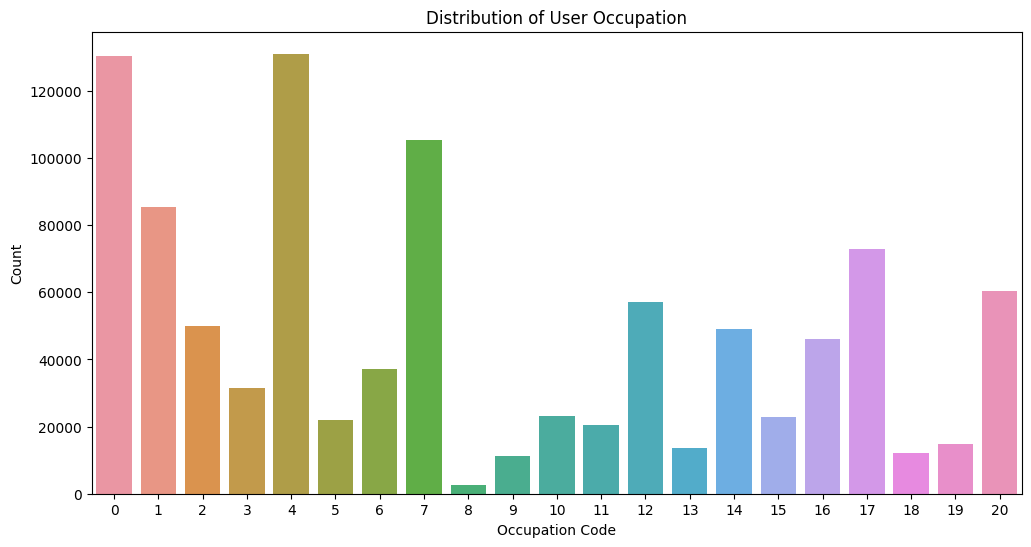

In [40]:
# Occupation distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', data=ratings_users)
plt.title('Distribution of User Occupation')
plt.xlabel('Occupation Code')
plt.ylabel('Count')
plt.show()

* High Variance in Counts: There is a significant variance in the number of users across different occupation codes, indicating that certain occupations are much more common among the users than others.

/tmp/ipykernel_25/449917764.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_by_occupation = merged_data.groupby('occupation')[genre_columns].mean()


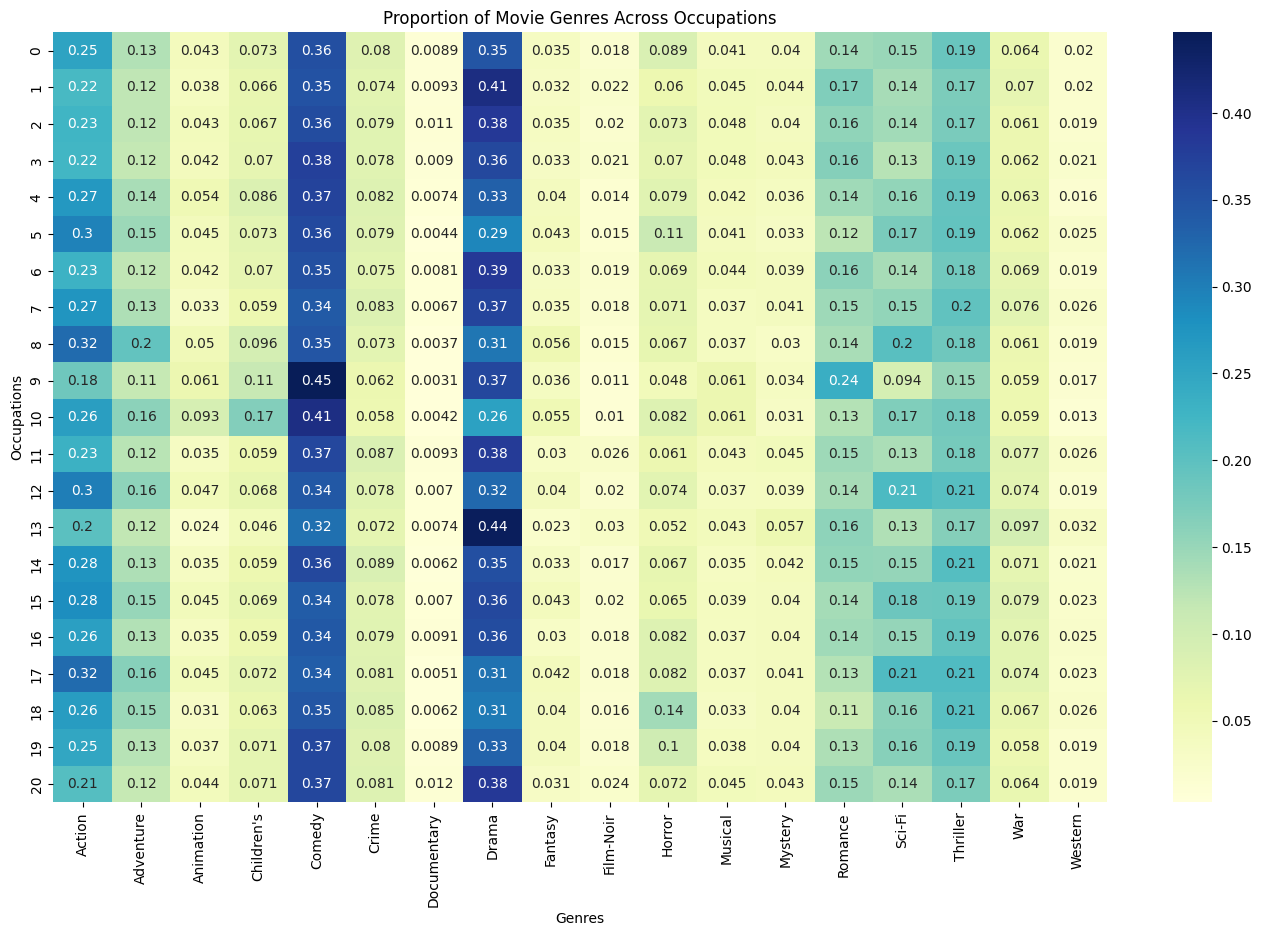

In [41]:
#genre preferences by occupation
genre_by_occupation = merged_data.groupby('occupation')[genre_columns].mean()
plt.figure(figsize=(17, 10))
sns.heatmap(genre_by_occupation, annot=True, cmap="YlGnBu")
plt.title('Proportion of Movie Genres Across Occupations')
plt.xlabel('Genres')
plt.ylabel('Occupations')
plt.show()

* Popularity of Genres: Certain genres like Drama, Action and Comedy appear to be more popular across the board because of the imbalanced dataset.
* Specialized Preferences: There are certain occupations that have a higher proportion of preference for specific genres. For example, there's a noticeable preference for Animation and Children's in occupation 10, for Comedy and Romance in occupation 9, and many other preferences

In [42]:
bins = list(range(0, 22))
labels = [f'Occupation_{i}' for i in bins[:-1]]

ratings_users['occupation_group'] = pd.cut(merged_data['occupation'], bins=bins, labels =labels, right=False)
occupation_counts = ratings_users.groupby(['movieid', 'occupation_group']).size().unstack(fill_value=0)
occupation_df = pd.DataFrame(occupation_counts.to_records())

/tmp/ipykernel_25/3516347758.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupation_counts = ratings_users.groupby(['movieid', 'occupation_group']).size().unstack(fill_value=0)


<a id="ss2-5" ></a>
## 5. Train

In [43]:
from functools import reduce

In [44]:
dataframes = [rating_df,merged_rating_df,gender_df,age_df,occupation_df]
user_rating_df = reduce(lambda left, right: pd.merge(left, right, on='movieid', how='inner'), dataframes)

In [45]:
user_rating_df

,movieid,rating_1,rating_2,rating_3,rating_4,rating_5,movie_rating_std_dev,movie_avg_rating,F,M,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,16,61,345,835,820,0.852349,4.146846,591,1486,...,45,127,28,117,45,99,143,29,27,118
1,2,42,108,266,237,48,0.983172,3.201141,176,525,...,17,43,11,33,14,30,56,8,11,34
2,3,44,95,191,105,43,1.071712,3.016736,136,342,...,7,32,5,24,18,14,33,7,7,32
3,4,21,47,65,31,6,1.013381,2.729412,85,85,...,7,7,2,4,2,2,17,0,5,14
4,5,28,54,118,80,16,1.025086,3.006757,108,188,...,5,16,6,8,7,18,20,7,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,3948,35,75,222,367,163,1.014196,3.635731,231,631,...,13,46,14,36,20,51,68,8,10,46
3702,3949,9,15,40,108,132,1.009804,4.115132,80,224,...,2,24,8,15,3,15,19,3,10,11
3703,3950,2,5,14,21,12,1.046107,3.666667,10,44,...,0,7,0,2,0,1,7,0,0,3
3704,3951,1,3,9,13,14,1.057331,3.900000,17,23,...,0,2,1,2,1,2,3,1,1,4


In [46]:
user_rating_df.shape

(3706, 38)

In [47]:
user_rating_columns = user_rating_df.columns[1:]

In [48]:
user_rating_movie_genre = pd.merge(user_rating_df,movies_merged,on ='movieid')

In [49]:
nan = user_rating_movie_genre.isna().any(axis = 1)
nan_rows_count = nan.sum()
nan_rows_count

114

In [50]:
user_rating_movie_genre.fillna(0, inplace=True)

In [51]:
rated_movies = user_rating_movie_genre['movieid']

In [52]:
not_rated_movieid = list(set(all_movieid) ^ set(rated_movies))

len(not_rated_movieid)

177

In [53]:
not_rated_movies = movies_merged[movies_merged['movieid'].isin(not_rated_movieid)]

In [54]:
user_rating_movie_genre = user_rating_movie_genre.reindex(sorted(user_rating_movie_genre.columns), axis=1)

In [55]:
train_user_data = pd.merge(train_index,user_rating_movie_genre,on='movieid')

In [56]:
test_user_data = pd.merge(test_index,user_rating_movie_genre,on='movieid')

In [57]:
user_X_train = train_user_data.drop(columns = genre_columns)
user_X_train = user_X_train.drop(columns = ['movieid','img_path','id'])
user_X_train.shape

(2963, 37)

In [58]:
user_X_test = test_user_data.drop(columns = genre_columns)
user_X_test = user_X_test.drop(columns = ['movieid','img_path','id'])
user_X_test.shape

(743, 37)

In [59]:
user_columns = user_X_train.columns

In [60]:
user_y_train = train_user_data[genre_columns]
user_y_train.shape

(2963, 18)

In [61]:
user_y_test = test_user_data[genre_columns]
user_y_test.shape

(743, 18)

In [62]:
user_X_train = np.array(user_X_train).astype('float32')
user_X_test = np.array(user_X_test).astype('float32')
user_y_train = np.array(user_y_train).astype('float32')
user_y_test = np.array(user_y_test).astype('float32')

<a id="sss2-5-1" ></a>
### 5.1. Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

import time

In [64]:
#Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, ccp_alpha=0.007, class_weight='balanced')


In [65]:
s = time.time()
# Create a MultiOutputClassifier to handle multi-label classification
multi_label_model = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Train the model
multi_label_model.fit(user_X_train, user_y_train)
e = time.time()
print(e-s)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


6.2557313442230225


In [66]:

# Predict on the test data
y_pred = multi_label_model.predict(user_X_test)
report = classification_report(user_y_test, y_pred, target_names=genre_columns, zero_division=0)

print(report)


              precision    recall  f1-score   support

      Action       0.33      0.71      0.45        89
   Adventure       0.14      0.49      0.22        47
   Animation       0.29      0.43      0.35        21
  Children's       0.26      0.60      0.36        48
      Comedy       0.38      0.51      0.43       239
       Crime       0.06      0.24      0.10        29
 Documentary       0.15      0.62      0.24        24
       Drama       0.51      0.75      0.61       293
     Fantasy       0.00      0.00      0.00         7
   Film-Noir       0.10      0.17      0.12         6
      Horror       0.23      0.58      0.33        74
     Musical       0.18      0.31      0.23        13
     Mystery       0.09      0.06      0.07        18
     Romance       0.25      0.61      0.36        92
      Sci-Fi       0.29      0.75      0.41        48
    Thriller       0.22      0.48      0.30       106
         War       0.17      0.36      0.23        25
     Western       0.10    

<a id="sss2-5-2" ></a>
### 5.2. Neural Network

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
from tensorflow import keras

In [69]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [70]:
NNmodel = Sequential()
NNmodel.add(Dense(64, input_dim=37, kernel_initializer='he_uniform', activation='relu'))
NNmodel.add(Dense(64, activation='relu')) 
NNmodel.add(Dense(64, activation='relu'))
NNmodel.add(Dense(64, activation='relu'))
NNmodel.add(Dense(18, activation='sigmoid'))

In [71]:
NNmodel.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='val_loss',   
    patience=5,           
    verbose=1,            
    restore_best_weights=True 
)

In [73]:
# Fit the model with the EarlyStopping callback
history = NNmodel.fit(
    user_X_train, 
    user_y_train, 
    validation_data=(user_X_test, user_y_test), 
    epochs=50, 
    batch_size=32,
    callbacks=[early_stopping_callback] 
)

Epoch 1/50
93/93 [==============================] - 5s 6ms/step - loss: 0.8861 - accuracy: 0.2275 - val_loss: 0.3642 - val_accuracy: 0.2840
Epoch 2/50
93/93 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.3277 - val_loss: 0.2834 - val_accuracy: 0.3755
Epoch 3/50
93/93 [==============================] - 0s 4ms/step - loss: 0.2837 - accuracy: 0.3517 - val_loss: 0.2585 - val_accuracy: 0.3634
Epoch 4/50
93/93 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.3685 - val_loss: 0.2478 - val_accuracy: 0.4186
Epoch 5/50
93/93 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.3868 - val_loss: 0.2399 - val_accuracy: 0.3917
Epoch 6/50
93/93 [==============================] - 0s 4ms/step - loss: 0.2445 - accuracy: 0.3874 - val_loss: 0.2313 - val_accuracy: 0.4024
Epoch 7/50
93/93 [==============================] - 0s 4ms/step - loss: 0.2345 - accuracy: 0.4036 - val_loss: 0.2285 - val_accuracy: 0.4159
Epoch 8/50
93/93 [==

In [74]:
user_y_pred_probs = NNmodel.predict(user_X_test)

24/24 [==============================] - 0s 1ms/step


In [75]:
from sklearn.metrics import f1_score

In [76]:
def find_best_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.1, 1, 0.05)
    
    best_threshold = 0
    best_f1 = 0

    for threshold in thresholds:
        y_pred = np.where(y_pred_probs > threshold, 1, 0)
        f1 = f1_score(y_true, y_pred, average='weighted')
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

In [77]:
best_threshold, best_f1 = find_best_threshold(user_y_test, user_y_pred_probs)

user_y_pred = np.where(user_y_pred_probs > best_threshold, 1, 0)

report = classification_report(user_y_test, user_y_pred, target_names=genre_columns)
print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score: {best_f1}')
print(report)

Best Threshold: 0.20000000000000004
Best F1 Score: 0.4745759434014383
              precision    recall  f1-score   support

      Action       0.48      0.72      0.58        89
   Adventure       0.22      0.17      0.19        47
   Animation       0.58      0.52      0.55        21
  Children's       0.60      0.58      0.59        48
      Comedy       0.38      0.93      0.54       239
       Crime       0.09      0.10      0.10        29
 Documentary       0.28      0.38      0.32        24
       Drama       0.52      0.91      0.66       293
     Fantasy       0.00      0.00      0.00         7
   Film-Noir       0.00      0.00      0.00         6
      Horror       0.28      0.55      0.37        74
     Musical       0.23      0.46      0.31        13
     Mystery       0.00      0.00      0.00        18
     Romance       0.42      0.54      0.47        92
      Sci-Fi       0.31      0.65      0.42        48
    Thriller       0.26      0.31      0.28       106
         Wa

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
userModel = NNmodel

In [79]:
userModel.save('userModel.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a id="s3" ></a>
# II. MOVIE TITLES

<a id="ss3-1" ></a>
## 1. Preprocessing

In [80]:
title_movies_train = movies_train
title_movies_test = movies_test

In [81]:
train_genres_encoded = movies_train['genre'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

test_genres_encoded = movies_test['genre'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

In [82]:
import re

In [83]:
# Function to extract year from the title and clean the title
def process_title(title):
    # Extract year using regular expression
    year_match = re.search(r'\((\d{4})\)', title)
    year = int(year_match.group(1)) if year_match else None

    # Remove the year and any special characters from the title
    cleaned_title = re.sub(r'\([^)]*\)', '', title).strip()
    cleaned_title = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_title).lower()

    return cleaned_title, year


In [84]:
# Apply the processing functions to the dataset
title_movies_train['cleaned_title'], title_movies_train['year'] = zip(*title_movies_train['title'].apply(process_title))
title_movies_test['cleaned_title'], title_movies_test['year'] = zip(*title_movies_test['title'].apply(process_title))

In [85]:
encoded_title_movies_train = pd.concat([title_movies_train.drop(columns = ['title','genre','year']),train_genres_encoded],axis = 1)

<a id="ss3-2" ></a>
## 2. Analyze

In [86]:
import nltk

In [87]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [89]:
# Tokenize the titles and create a list of words
# Removing stopwords as they do not contribute much to the genre classification
stop_words = set(stopwords.words('english'))
all_words = []

for title in encoded_title_movies_train['cleaned_title']:
    words = word_tokenize(title)
    words_filtered = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    all_words.extend(words_filtered)

In [90]:
from nltk.probability import FreqDist
# Calculate the frequency distribution
word_freq = FreqDist(all_words)

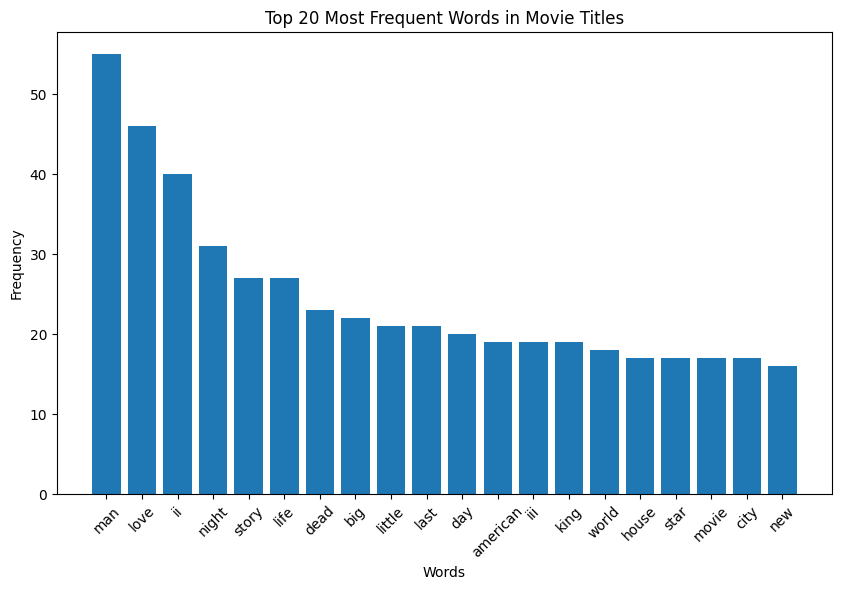

In [91]:
# Extracting the top N words for visualization
top_n = 20
top_words = word_freq.most_common(top_n)
words, frequencies = zip(*top_words)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Movie Titles')
plt.xticks(rotation=45)
plt.show()

In [92]:
# Creating a dictionary to store genre frequencies for each top word
genre_freq_for_words = {word: {} for word, freq in top_words}

# For each top word, calculate the frequency of each genre
for word in genre_freq_for_words.keys():
    # Filter the dataset for titles containing the word
    filtered_df = encoded_title_movies_train[encoded_title_movies_train['cleaned_title'].str.contains(word, na=False)]

    # Count the frequency of each genre
    for genre in genre_columns:
        genre_freq_for_words[word][genre] = filtered_df[genre].sum()

In [93]:
# Convert the dictionary to a DataFrame for better visualization
genre_freq_df = pd.DataFrame.from_dict(genre_freq_for_words, orient='index')

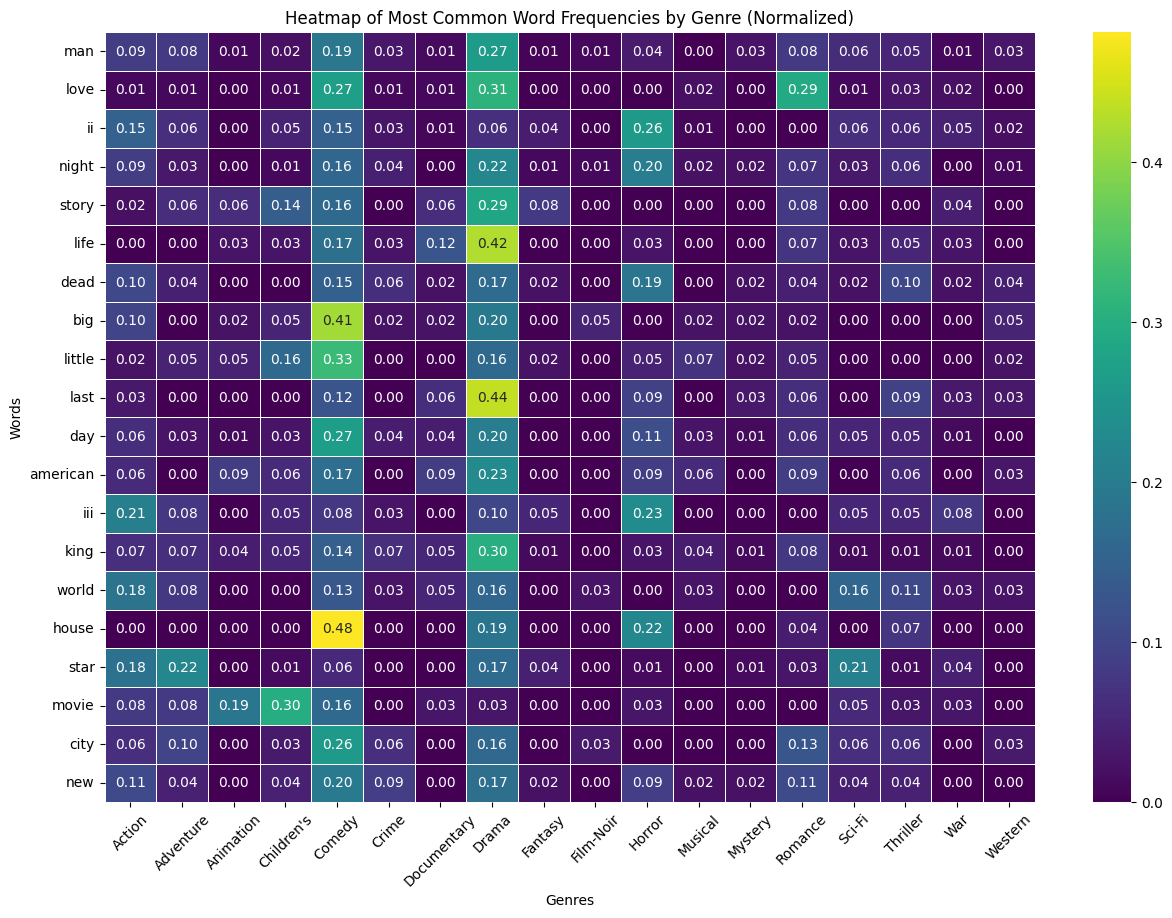

In [94]:
genre_freq_normalized = genre_freq_df.div(genre_freq_df.sum(axis=1), axis=0)
# Creating the heatmap with numerical annotations
plt.figure(figsize=(15, 10))
sns.heatmap(genre_freq_normalized, annot=True, cmap='viridis', linewidths=.5, fmt=".2f")
plt.title('Heatmap of Most Common Word Frequencies by Genre (Normalized)')
plt.xlabel('Genres')
plt.ylabel('Words')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Genre-Specific Keywords: Certain words are strongly associated with specific genres
* "love": obviouly Drama and Romance.
* "house", "big" and "little": Comedy.
* "star": Sci-Fi, which could be associated with the concept of space.
* "night", "dead" and "house": Horror because of its dark theme
* Drama has many high frequency words sine it often deals with universal themes that are relevant across various cultures and time periods, such as "man", "love", "life".
* Action and Horror are the most likely to have a trilogy since high frequency of "ii" and "iii"
* and many other more

<a id="ss3-3" ></a>
## 3. Train

<a id="sss3-3-1" ></a>
### 3.1. TF-IDF

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
# Using TF-IDF Vectorizer
train_tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for simplicity
train_tfidf_matrix = train_tfidf_vectorizer.fit_transform(title_movies_train['cleaned_title'])


test_tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for simplicity
test_tfidf_matrix = test_tfidf_vectorizer.fit_transform(title_movies_test['cleaned_title'])

test_tfidf_matrix.shape, train_tfidf_matrix.shape

((777, 1000), (3106, 1000))

In [97]:
title_X_train = train_tfidf_matrix
title_X_test = test_tfidf_matrix

In [98]:
title_y_train = train_genres_encoded.reindex(sorted(train_genres_encoded.columns), axis=1).to_numpy()
title_y_test = test_genres_encoded.reindex(sorted(test_genres_encoded.columns), axis=1).to_numpy()

<a id="ssss3-3-1-a" ></a>
#### a. Naive Bayes

In [99]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB

In [100]:
naive_bayes_classifier = OneVsRestClassifier(MultinomialNB())

In [101]:
naive_bayes_classifier.fit(title_X_train, title_y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [102]:
# Predictions on the test set
genre_pred = naive_bayes_classifier.predict(title_X_test)

# Compute and display the classification report
classification_metrics = classification_report(genre_pred, title_y_test, target_names=genre_columns, zero_division=0)
print(classification_metrics)

              precision    recall  f1-score   support

      Action       0.07      0.38      0.11        16
   Adventure       0.00      0.00      0.00         1
   Animation       0.00      0.00      0.00         0
  Children's       0.00      0.00      0.00         1
      Comedy       0.17      0.36      0.23       114
       Crime       0.00      0.00      0.00         0
 Documentary       0.00      0.00      0.00         0
       Drama       0.30      0.38      0.34       244
     Fantasy       0.00      0.00      0.00         0
   Film-Noir       0.00      0.00      0.00         0
      Horror       0.00      0.00      0.00         7
     Musical       0.00      0.00      0.00         0
     Mystery       0.00      0.00      0.00         0
     Romance       0.00      0.00      0.00         2
      Sci-Fi       0.02      1.00      0.04         1
    Thriller       0.02      0.18      0.03        11
         War       0.00      0.00      0.00         0
     Western       0.00    

<a id="ssss3-3-1-b" ></a>
#### b. SVM

In [103]:
from sklearn.svm import SVC

In [104]:
svm_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

In [105]:
svm_model.fit(title_X_train, title_y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=42))

In [106]:
# Predictions on the test set
genre_pred = svm_model.predict(title_X_test)

# Compute and display the classification report
classification_metrics = classification_report(genre_pred, title_y_test, target_names=genre_columns, zero_division=0)
print(classification_metrics)

              precision    recall  f1-score   support

      Action       0.10      0.26      0.14        35
   Adventure       0.02      0.07      0.03        15
   Animation       0.00      0.00      0.00         5
  Children's       0.04      0.09      0.06        22
      Comedy       0.11      0.30      0.16        89
       Crime       0.00      0.00      0.00         5
 Documentary       0.00      0.00      0.00         2
       Drama       0.26      0.42      0.32       195
     Fantasy       0.00      0.00      0.00         1
   Film-Noir       0.00      0.00      0.00         0
      Horror       0.07      0.12      0.09        42
     Musical       0.00      0.00      0.00         5
     Mystery       0.00      0.00      0.00         5
     Romance       0.04      0.18      0.07        22
      Sci-Fi       0.04      0.09      0.06        23
    Thriller       0.03      0.23      0.05        13
         War       0.00      0.00      0.00         8
     Western       0.00    

<a id="ssss3-3-1-c" ></a>
#### c. Random Forest

In [107]:
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=50))
s = time.time()
rf_model.fit(title_X_train, title_y_train)
e = time.time()
print(e-s)

9.98316502571106


In [108]:
# Predictions on the test set
genre_pred = rf_model.predict(title_X_test)

# Compute and display the classification report
classification_metrics = classification_report(genre_pred, title_y_test, target_names=genre_columns, zero_division=0)
print(classification_metrics)

              precision    recall  f1-score   support

      Action       0.14      0.15      0.15        87
   Adventure       0.04      0.06      0.05        31
   Animation       0.00      0.00      0.00         4
  Children's       0.06      0.12      0.08        25
      Comedy       0.28      0.30      0.29       232
       Crime       0.03      0.06      0.04        16
 Documentary       0.00      0.00      0.00         7
       Drama       0.34      0.36      0.35       293
     Fantasy       0.00      0.00      0.00         1
   Film-Noir       0.00      0.00      0.00         2
      Horror       0.15      0.12      0.13        93
     Musical       0.00      0.00      0.00         6
     Mystery       0.00      0.00      0.00         6
     Romance       0.06      0.11      0.08        57
      Sci-Fi       0.04      0.05      0.05        40
    Thriller       0.08      0.15      0.10        53
         War       0.00      0.00      0.00        11
     Western       0.00    

<a id="sss3-2-2"></a>
### Neural Network (LSTM)

In [109]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Data Preparation
max_words = 10000  # Consider the top 10,000 words in the dataset
max_len = 30  # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(movies_train['cleaned_title'])

In [110]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_sequences = tokenizer.texts_to_sequences(title_movies_train['cleaned_title'])
title_X_train = pad_sequences(train_sequences, maxlen=max_len)

test_sequences = tokenizer.texts_to_sequences(title_movies_test['cleaned_title'])
title_X_test = pad_sequences(test_sequences, maxlen=max_len)

In [111]:
title_X_train = np.array(title_X_train).astype('float32')
title_X_test = np.array(title_X_test).astype('float32')
title_y_train = np.array(title_y_train).astype('float32')
title_y_test = np.array(title_y_test).astype('float32')

In [112]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras import regularizers

In [113]:
# Model Architecture
LSTMmodel = Sequential()
LSTMmodel.add(Embedding(max_words, 128, input_length=max_len))
LSTMmodel.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
LSTMmodel.add(Dropout(0.5))
LSTMmodel.add(Dense(18, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

In [114]:
LSTMmodel.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [115]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss',   
    patience=5,           
    verbose=1,            
    restore_best_weights=True 
)

In [116]:
history = LSTMmodel.fit(title_X_train, title_y_train, 
    validation_data=(title_X_test, title_y_test),
    epochs=50, 
    batch_size=32,
    callbacks=[early_stopping_callback])

Epoch 1/50
98/98 [==============================] - 33s 273ms/step - loss: 0.4882 - accuracy: 0.2630 - val_loss: 0.3275 - val_accuracy: 0.2973
Epoch 2/50
98/98 [==============================] - 21s 214ms/step - loss: 0.3112 - accuracy: 0.3042 - val_loss: 0.2732 - val_accuracy: 0.2973
Epoch 3/50
98/98 [==============================] - 21s 218ms/step - loss: 0.2811 - accuracy: 0.3004 - val_loss: 0.2624 - val_accuracy: 0.2741
Epoch 4/50
98/98 [==============================] - 21s 209ms/step - loss: 0.2739 - accuracy: 0.3049 - val_loss: 0.2585 - val_accuracy: 0.2973
Epoch 5/50
98/98 [==============================] - 20s 208ms/step - loss: 0.2719 - accuracy: 0.2991 - val_loss: 0.2574 - val_accuracy: 0.2973
Epoch 6/50
98/98 [==============================] - 20s 206ms/step - loss: 0.2709 - accuracy: 0.3004 - val_loss: 0.2580 - val_accuracy: 0.2973
Epoch 7/50
98/98 [==============================] - 20s 209ms/step - loss: 0.2704 - accuracy: 0.3030 - val_loss: 0.2576 - val_accuracy: 0.2741

In [117]:
y_pred_probs = LSTMmodel.predict(title_X_test)


25/25 [==============================] - 1s 13ms/step


In [118]:
best_threshold, best_f1 = find_best_threshold(title_y_test, y_pred_probs)


title_y_pred = np.where(y_pred_probs > best_threshold, 1, 0)

report = classification_report(title_y_test, title_y_pred, target_names=genre_columns)
print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score: {best_f1}')
print(report)

Best Threshold: 0.1
Best F1 Score: 0.31192354957292784
              precision    recall  f1-score   support

      Action       0.14      0.58      0.23        90
   Adventure       0.00      0.00      0.00        48
   Animation       0.00      0.00      0.00        21
  Children's       0.00      0.00      0.00        48
      Comedy       0.32      1.00      0.48       247
       Crime       0.00      0.00      0.00        31
 Documentary       0.00      0.00      0.00        30
       Drama       0.40      1.00      0.57       309
     Fantasy       0.00      0.00      0.00         7
   Film-Noir       0.00      0.00      0.00         6
      Horror       0.14      0.36      0.21        75
     Musical       0.00      0.00      0.00        13
     Mystery       0.00      0.00      0.00        18
     Romance       0.12      1.00      0.22        94
      Sci-Fi       0.18      0.50      0.27        48
    Thriller       0.17      0.21      0.19       106
         War       0.00   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reasons for low performance
* Lack of Contextual Information: Movie titles often lack sufficient context to accurately determine genre. For example, a title like "The Great Escape" could imply an adventure, war, or even a thriller genre, depending on other contextual elements not present in the title alone.
* Stylized or Abstract Titles: Some titles are abstract, stylized, or metaphorical (e.g., "The Shawshank Redemption", "Brazil"), providing little to no information about the genre.
* Homonyms and Common Phrases: Titles that are common phrases or words (e.g., "Heat," "Network") can be particularly challenging, as they give no indication of the movie's content or genre.
* Lack of Descriptive Elements: Unlike synopses, reviews, or ratings, titles do not contain descriptive elements like character names, settings, or plot details, which are often crucial for accurate genre classification.

In [119]:
titleModel = LSTMmodel

In [120]:
titleModel.save('titleModel.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a id="s4" ></a>
# III. MOVIE POSTERS

<a id="ss4-1"></a>
### 1. Preprocessing

In [121]:
poster_train = movies_train

In [122]:
poster_test = movies_test

In [123]:
poster_train.shape

(3106, 7)

In [124]:
poster_test.shape

(777, 7)

In [125]:
width = 224
height = 224

In [126]:
from tqdm import tqdm

In [127]:
indices_to_drop = []
for i in tqdm(range(len(poster_train))):
    path = '/kaggle/working/' + poster_train['img_path'][i]
    if not os.path.exists(path):  # Check if the file exists
        indices_to_drop.append(i)  # Mark the index if the file doesn't exist

# Drop the rows with the missing images from the DataFrame
poster_train = poster_train.drop(indices_to_drop).reset_index(drop=True)

100%|██████████| 3106/3106 [00:00<00:00, 58620.15it/s]


In [128]:
test_indices_to_drop = []
for i in tqdm(range(len(poster_test))):
    path = '/kaggle/working/' + poster_test['img_path'][i]
    if not os.path.exists(path):  
        test_indices_to_drop.append(i)  # Mark the index if the file doesn't exist

# Drop the rows with the missing images from the DataFrame
poster_test = poster_test.drop(test_indices_to_drop).reset_index(drop=True)

100%|██████████| 777/777 [00:00<00:00, 57188.03it/s]


In [129]:
poster_train.shape

(2602, 7)

In [130]:
poster_test.shape

(654, 7)

In [131]:
poster_train_genres_encoded = poster_train['genre'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

In [132]:
poster_test_genres_encoded = poster_test['genre'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

In [133]:
encoded_poster_train = pd.concat([poster_train.drop(columns = ['title','genre','id','cleaned_title','year']),poster_train_genres_encoded], axis = 1)

In [134]:
encoded_poster_test= pd.concat([poster_test.drop(columns = ['title','genre','id','cleaned_title','year']),poster_test_genres_encoded], axis = 1)

<a id="ss4-2" ></a>
## 2. Analyze

In [135]:
genre_distribution = encoded_poster_train[genre_columns].sum().sort_values(ascending=False)

In [136]:
genre_distribution

Drama          1007
Comedy          832
Action          384
Thriller        349
Romance         345
Horror          244
Adventure       223
Sci-Fi          219
Children's      196
Crime           161
War             110
Musical          96
Animation        83
Mystery          79
Fantasy          58
Documentary      53
Western          51
Film-Noir        34
dtype: int64

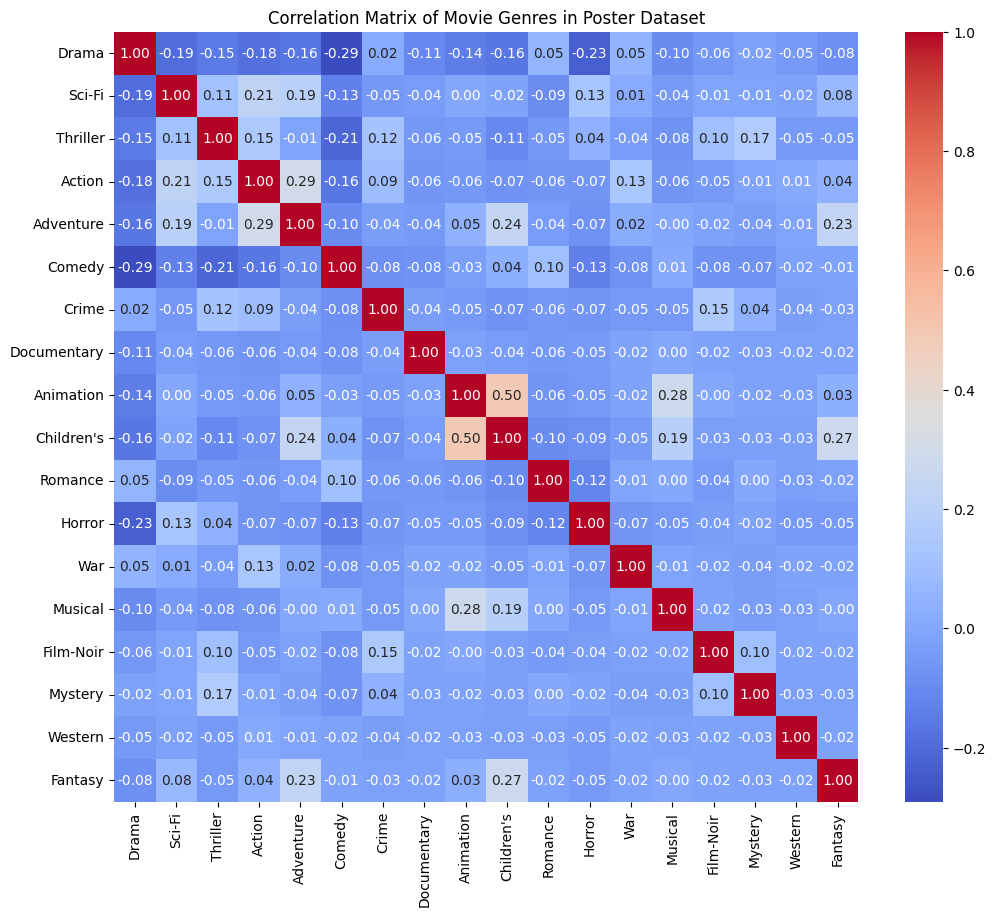

In [137]:
correlation_matrix = poster_train_genres_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Movie Genres in Poster Dataset")
plt.show()

* Applied data augmentation
    * Posters belong to genre with 100-345 samples will be augmented 2 times
    * Posters belong to genre with fewer than 100 samples will be augmented 4 times
    * The remain genres  (Drame, Comedy, Action) might also see increase in number of samples because of their high correlation with the chosen genres (.eg, Action and Adventure,...)

<a id="ss4-3" ></a>
## 3. Data Augmentation

In [138]:
genres_to_augment_2 = genre_distribution[(genre_distribution <= 345) & (genre_distribution > 100)].index.tolist()

In [139]:
genres_to_augment_4 = genre_distribution[genre_distribution < 100].index.tolist()

In [140]:
print(genres_to_augment_2)

['Romance', 'Horror', 'Adventure', 'Sci-Fi', "Children's", 'Crime', 'War']


In [141]:
print(genres_to_augment_4)

['Musical', 'Animation', 'Mystery', 'Fantasy', 'Documentary', 'Western', 'Film-Noir']


In [142]:
for_aug_poster_train = encoded_poster_train.drop(columns = 'movieid')

In [143]:
mask1 = for_aug_poster_train[genres_to_augment_2].sum(axis=1) > 0
mask2 = for_aug_poster_train[genres_to_augment_4].sum(axis=1) > 0
# Apply the mask to the DataFrame to filter the rows
df_for_augment_2 = for_aug_poster_train[mask1]
df_for_augment_4 = for_aug_poster_train[mask2]

In [144]:
import random
from PIL import Image, ImageEnhance, ImageOps

In [145]:
def random_augmentation(image_path, save_dir, augment_index):
    img = Image.open(image_path)
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    # Random augmentation
    # Random rotation between -30 and 30 degrees
    if random.choice([True, False]):
        img = img.rotate(random.uniform(-30, 30))

    # Random horizontal flip
    if random.choice([True, False]):
        img = ImageOps.mirror(img)

    # Random zoom (crop and resize)
    if random.choice([True, False]):
        x, y = img.size
        startx = x // 4 * random.uniform(0, 1)
        starty = y // 4 * random.uniform(0, 1)
        img = img.crop((startx, starty, x - startx, y - starty))
        img = img.resize((x, y))

    # Random brightness change
    if random.choice([True, False]):
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(random.uniform(0.5, 1.5))

    # Save the augmented image
    new_path = os.path.join(save_dir, f"{base_name}_aug_{augment_index}.jpg")
    img.save(new_path)

    return new_path

In [146]:
from pathlib import Path
Path('/kaggle/working/augmented').mkdir(parents=True, exist_ok=True)

In [147]:
augment_count = 2

new_rows_2 = []
for _, row in df_for_augment_2.iterrows():
    for i in range(augment_count):
        new_img_path = random_augmentation(row['img_path'], '/kaggle/working/augmented', i)
        new_row = row.to_dict()
        new_row['img_path'] = new_img_path
        new_rows_2.append(new_row)
        
aug_df_2 = pd.DataFrame(new_rows_2)

In [148]:
augment_count = 4

new_rows_4 = []
for _, row in df_for_augment_4.iterrows():
    for i in range(augment_count):
        new_img_path = random_augmentation(row['img_path'], '/kaggle/working/augmented', i)
        new_row = row.to_dict()
        new_row['img_path'] = new_img_path
        new_rows_4.append(new_row)
        
aug_df_4 = pd.DataFrame(new_rows_4)

In [149]:
aug_df_2.shape, aug_df_4.shape

((2480, 19), (1648, 19))

In [150]:
aug_df = pd.concat([aug_df_2, aug_df_4], ignore_index=True)

In [151]:
augmented_pd= pd.concat([for_aug_poster_train,aug_df])
augmented_pd.reset_index(drop=True)
new_genre_distribution = augmented_pd[genre_columns].sum().sort_values(ascending=False)

In [152]:
genre_distribution

Drama          1007
Comedy          832
Action          384
Thriller        349
Romance         345
Horror          244
Adventure       223
Sci-Fi          219
Children's      196
Crime           161
War             110
Musical          96
Animation        83
Mystery          79
Fantasy          58
Documentary      53
Western          51
Film-Noir        34
dtype: int64

In [153]:
new_genre_distribution

Drama          1907
Comedy         1844
Romance        1163
Action         1042
Children's     1004
Thriller        921
Adventure       873
Sci-Fi          781
Horror          764
Musical         580
Crime           567
Animation       561
Mystery         459
Fantasy         390
War             358
Western         273
Documentary     267
Film-Noir       202
dtype: int64

<a id="ss4-4" ></a>
## 4. Train

In [154]:
from tensorflow.keras.preprocessing import image

In [155]:
poster_X_train = []
for i in tqdm(range(len(for_aug_poster_train))):
    path = '/kaggle/working/' + for_aug_poster_train['img_path'][i]
    img = image.load_img(path,target_size=(width,height,3))
    img = image.img_to_array(img)
    img = img/255.0
    poster_X_train.append(img)

100%|██████████| 2602/2602 [00:04<00:00, 550.41it/s]


In [156]:
for i in tqdm(range(len(aug_df))):
    path = aug_df['img_path'][i]
    img = image.load_img(path,target_size=(width,height,3))
    img = image.img_to_array(img)
    img = img/255.0
    poster_X_train.append(img)

100%|██████████| 4128/4128 [00:06<00:00, 597.98it/s]


In [157]:
poster_y_train = augmented_pd[genre_columns]

In [158]:
poster_y_train.shape

(6730, 18)

In [159]:
poster_X_train = np.array(poster_X_train)

In [160]:
poster_X_train.shape

(6730, 224, 224, 3)

In [161]:
poster_X_test = []
for i in tqdm(range(len(encoded_poster_test))):
    path = '/kaggle/working/' + encoded_poster_test['img_path'][i]
    img = image.load_img(path,target_size=(width,height,3))
    img = image.img_to_array(img)
    img = img/255.0
    poster_X_test.append(img)
    
poster_X_test = np.array(poster_X_test)

100%|██████████| 654/654 [00:01<00:00, 623.01it/s]


In [162]:
poster_y_test =  encoded_poster_test[genre_columns]

In [163]:
poster_y_test.shape

(654, 18)

In [164]:
poster_X_test.shape

(654, 224, 224, 3)

In [165]:
poster_y_test = poster_y_test.reindex(sorted(poster_y_test.columns), axis=1)
poster_y_train = poster_y_train.reindex(sorted(poster_y_train.columns), axis=1)

In [166]:
poster_X_train = np.array(poster_X_train).astype('float32')
poster_X_test = np.array(poster_X_test).astype('float32')
poster_y_train = np.array(poster_y_train).astype('float32')
poster_y_test = np.array(poster_y_test).astype('float32')

In [167]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization

<a id="sss4-4-1" ></a>
### CNN Model (Resnet50)

In [168]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Input

In [169]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))

# Set the base model's layers to be non-trainable
base_model.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [170]:
CNNModel = Sequential()
# Add the base model
CNNModel.add(base_model)
CNNModel.add(Flatten())

# Custom layers
CNNModel.add(Dense(128, activation='relu'))
CNNModel.add(BatchNormalization())
CNNModel.add(Dropout(0.5))

# Final classification layer
CNNModel.add(Dense(18, activation='sigmoid'))

In [171]:
CNNModel.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [172]:

early_stopping_callback = EarlyStopping(
    monitor='val_loss',   
    patience=5,           
    verbose=1,            
    restore_best_weights=True 
)

In [173]:

history = CNNModel.fit(poster_X_train, poster_y_train, epochs=20, validation_data=(poster_X_test, poster_y_test),callbacks=[early_stopping_callback] )


Epoch 1/20
211/211 [==============================] - 24s 76ms/step - loss: 0.5133 - accuracy: 0.1165 - val_loss: 0.3091 - val_accuracy: 0.2844
Epoch 2/20
211/211 [==============================] - 14s 66ms/step - loss: 0.3326 - accuracy: 0.2045 - val_loss: 0.2636 - val_accuracy: 0.3257
Epoch 3/20
211/211 [==============================] - 14s 65ms/step - loss: 0.3142 - accuracy: 0.2331 - val_loss: 0.2707 - val_accuracy: 0.2737
Epoch 4/20
211/211 [==============================] - 14s 65ms/step - loss: 0.2980 - accuracy: 0.2593 - val_loss: 0.2656 - val_accuracy: 0.2661
Epoch 5/20
211/211 [==============================] - 14s 65ms/step - loss: 0.2851 - accuracy: 0.2840 - val_loss: 0.3027 - val_accuracy: 0.2554
Epoch 6/20
211/211 [==============================] - 14s 65ms/step - loss: 0.2736 - accuracy: 0.3031 - val_loss: 0.2781 - val_accuracy: 0.2859
Epoch 7/20
211/211 [==============================] - 14s 66ms/step - loss: 0.2626 - accuracy: 0.3239 - val_loss: 0.3119 - val_accuracy:

In [174]:
poster_y_pred_probs = CNNModel.predict(poster_X_test)

21/21 [==============================] - 2s 54ms/step


In [175]:
best_threshold, best_f1 = find_best_threshold(poster_y_test, poster_y_pred_probs)

poster_y_pred = np.where(poster_y_pred_probs > best_threshold, 1, 0)

report = classification_report(poster_y_test, poster_y_pred, target_names=genre_columns)
print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score: {best_f1}')
print(report)

Best Threshold: 0.15000000000000002
Best F1 Score: 0.3430109242236151
              precision    recall  f1-score   support

      Action       0.19      0.65      0.30        86
   Adventure       0.09      0.56      0.15        43
   Animation       0.11      0.62      0.18        21
  Children's       0.17      0.55      0.26        47
      Comedy       0.34      1.00      0.50       220
       Crime       0.03      0.04      0.03        27
 Documentary       0.00      0.00      0.00        18
       Drama       0.41      0.92      0.56       248
     Fantasy       0.00      0.00      0.00         7
   Film-Noir       0.00      0.00      0.00         6
      Horror       0.13      0.78      0.23        67
     Musical       0.03      0.45      0.05        11
     Mystery       0.00      0.00      0.00        18
     Romance       0.14      0.84      0.24        83
      Sci-Fi       0.11      0.18      0.13        44
    Thriller       0.22      0.45      0.30       104
         Wa

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Visual Ambiguity: Movie posters often contain abstract, stylized, or symbolic imagery that doesn't clearly represent the genre. For instance, a science fiction and a fantasy film might have similarly surreal posters.
* Limited Information: Posters primarily focus on attracting viewers and may not provide sufficient details about the movie's plot, setting, or tone, which are crucial for genre classification.
* Marketing Strategies: Some posters are designed to appeal to a broader audience and might downplay certain genre-specific elements. For example, a horror movie poster might look more like a thriller to attract a wider audience.
* Overlapping Genres: Many films are a mix of genres (like romantic comedies or sci-fi thrillers), making it challenging to classify them based on a single image.

In [176]:
posterModel = CNNModel 

In [177]:
posterModel.save('posterModel.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a id="s5" ></a>
# IV. COMBINE

In [178]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

In [179]:
user_X_train.shape, title_X_train.shape, poster_X_train.shape

((2963, 37), (3106, 30), (6730, 224, 224, 3))

In [180]:
user_y_train.shape, title_y_train.shape, poster_y_train.shape

((2963, 18), (3106, 18), (6730, 18))

* Fill mean value for movies have not been rated

In [181]:
additional_columns = [col for col in user_rating_movie_genre.columns if col not in not_rated_movies.columns]
additional_columns_means = user_rating_movie_genre[additional_columns].mean()

In [182]:
for col, mean_val in additional_columns_means.items():
    not_rated_movies.loc[:, col] = mean_val


/tmp/ipykernel_25/3515524217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_rated_movies.loc[:, col] = mean_val
/tmp/ipykernel_25/3515524217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_rated_movies.loc[:, col] = mean_val
/tmp/ipykernel_25/3515524217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [183]:
all_movies_rated =  pd.concat([user_rating_movie_genre, not_rated_movies])

In [184]:
final_X_train = pd.merge(movies_train.drop(columns = ['img_path','id']),all_movies_rated , on='movieid')

In [185]:
final_X_test = pd.merge(movies_test.drop(columns = ['img_path','id']),all_movies_rated , on='movieid')

* Generate random images for movies with missing posters

In [186]:
final_poster_X_train = []
for i in tqdm(range(len(final_X_train))):
    path = '/kaggle/working/' + final_X_train['img_path'][i]
    if os.path.exists(path):  
        img = image.load_img(path,target_size=(width,height,3))
        img = image.img_to_array(img)
        img = img/255.0
        final_poster_X_train.append(img)  
    else:
        img = np.random.rand(width, height, 3)  # Create a random image
        img = img/255.0
        final_poster_X_train.append(img)

100%|██████████| 3106/3106 [00:04<00:00, 623.54it/s]


In [187]:
final_poster_X_test = []
for i in tqdm(range(len(final_X_test))):
    path = '/kaggle/working/' + final_X_test['img_path'][i]
    if os.path.exists(path):  
        img = image.load_img(path,target_size=(width,height,3))
        img = image.img_to_array(img)
        img = img/255.0
        final_poster_X_test.append(img)  
    else:
        img = np.random.rand(width, height, 3)  # Create a random image
        img = img/255.0
        final_poster_X_test.append(img)


100%|██████████| 777/777 [00:01<00:00, 508.91it/s]


In [188]:
final_y_train = final_X_train[genre_columns]

In [189]:
final_y_test = final_X_test[genre_columns]

In [190]:
final_user_X_train = final_X_train[user_columns]

In [191]:
final_user_X_test = final_X_test[user_columns]

In [192]:
train_sequences = tokenizer.texts_to_sequences(final_X_train['cleaned_title'])
final_title_X_train = pad_sequences(train_sequences, maxlen=max_len)

In [193]:
test_sequences = tokenizer.texts_to_sequences(final_X_test['cleaned_title'])
final_title_X_test = pad_sequences(test_sequences, maxlen=max_len)

In [194]:
final_poster_X_train = np.array(final_poster_X_train).astype('float32')
final_title_X_train = np.array(final_title_X_train).astype('float32')
final_user_X_train = np.array(final_user_X_train).astype('float32')
final_y_train = np.array(final_y_train).astype('float32')

In [195]:
final_poster_X_test = np.array(final_poster_X_test).astype('float32')
final_title_X_test = np.array(final_title_X_test).astype('float32')
final_user_X_test = np.array(final_user_X_test).astype('float32')
final_y_test = np.array(final_y_test).astype('float32')

<a id="ss5-1" ></a>
# 1. Use mean value

In [196]:
y_pred_probs_1 = (posterModel.predict(final_poster_X_test) + titleModel.predict(final_title_X_test) + userModel.predict(final_user_X_test)) /3

25/25 [==============================] - 0s 1ms/step


In [197]:
best_threshold_1, best_f1 = find_best_threshold(final_y_test, y_pred_probs_1)


y_pred = np.where(y_pred_probs_1 > best_threshold_1, 1, 0)

report = classification_report(final_y_test, y_pred, target_names=genre_columns)
print(f'Best Threshold: {best_threshold_1}')
print(f'Best F1 Score: {best_f1}')
print(report)

Best Threshold: 0.25000000000000006
Best F1 Score: 0.4151481023428493
              precision    recall  f1-score   support

      Action       0.71      0.49      0.58        90
   Adventure       0.00      0.00      0.00        48
   Animation       1.00      0.29      0.44        21
  Children's       0.74      0.54      0.63        48
      Comedy       0.33      1.00      0.50       247
       Crime       0.00      0.00      0.00        31
 Documentary       0.00      0.00      0.00        30
       Drama       0.46      0.94      0.62       309
     Fantasy       0.00      0.00      0.00         7
   Film-Noir       0.00      0.00      0.00         6
      Horror       0.44      0.25      0.32        75
     Musical       0.50      0.31      0.38        13
     Mystery       0.00      0.00      0.00        18
     Romance       0.67      0.38      0.49        94
      Sci-Fi       0.53      0.42      0.47        48
    Thriller       0.80      0.04      0.07       106
         Wa

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Since userModel gives better prediction, I will try increase its weight

In [198]:
y_pred_probs_2 = (posterModel.predict(final_poster_X_test) + titleModel.predict(final_title_X_test) + 2*userModel.predict(final_user_X_test)) /4

25/25 [==============================] - 0s 1ms/step


In [199]:
best_threshold_2, best_f1 = find_best_threshold(final_y_test, y_pred_probs_2)


y_pred = np.where(y_pred_probs_2 > best_threshold_2, 1, 0)

report = classification_report(final_y_test, y_pred, target_names=genre_columns)
print(f'Best Threshold: {best_threshold_2}')
print(f'Best F1 Score: {best_f1}')
print(report)

Best Threshold: 0.30000000000000004
Best F1 Score: 0.4437808028596174
              precision    recall  f1-score   support

      Action       0.72      0.51      0.60        90
   Adventure       0.33      0.02      0.04        48
   Animation       1.00      0.29      0.44        21
  Children's       0.76      0.54      0.63        48
      Comedy       0.40      0.86      0.55       247
       Crime       0.00      0.00      0.00        31
 Documentary       0.00      0.00      0.00        30
       Drama       0.54      0.88      0.67       309
     Fantasy       0.00      0.00      0.00         7
   Film-Noir       0.00      0.00      0.00         6
      Horror       0.43      0.25      0.32        75
     Musical       0.40      0.31      0.35        13
     Mystery       0.00      0.00      0.00        18
     Romance       0.65      0.37      0.47        94
      Sci-Fi       0.56      0.48      0.52        48
    Thriller       0.80      0.04      0.07       106
         Wa

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
y_pred_probs_3 = (posterModel.predict(final_poster_X_test) + titleModel.predict(final_title_X_test) + 3*userModel.predict(final_user_X_test)) /5

25/25 [==============================] - 0s 1ms/step


In [201]:
best_threshold_3, best_f1 = find_best_threshold(final_y_test, y_pred_probs_3)

y_pred = np.where(y_pred_probs_3 > best_threshold_3, 1, 0)

report = classification_report(final_y_test, y_pred, target_names=genre_columns)
print(f'Best Threshold: {best_threshold_3}')
print(f'Best F1 Score: {best_f1}')
print(report)

Best Threshold: 0.30000000000000004
Best F1 Score: 0.45048361459777264
              precision    recall  f1-score   support

      Action       0.70      0.54      0.61        90
   Adventure       0.20      0.02      0.04        48
   Animation       1.00      0.29      0.44        21
  Children's       0.76      0.54      0.63        48
      Comedy       0.42      0.85      0.56       247
       Crime       0.00      0.00      0.00        31
 Documentary       1.00      0.03      0.06        30
       Drama       0.54      0.86      0.67       309
     Fantasy       0.00      0.00      0.00         7
   Film-Noir       0.00      0.00      0.00         6
      Horror       0.38      0.31      0.34        75
     Musical       0.36      0.31      0.33        13
     Mystery       0.00      0.00      0.00        18
     Romance       0.63      0.39      0.48        94
      Sci-Fi       0.54      0.52      0.53        48
    Thriller       0.42      0.05      0.08       106
         W

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id="ss5-2" ></a>
# 2. Create new model

In [202]:
posterModel.trainable = False
titleModel.trainable = False
userModel.trainable = False

combined_output = concatenate([posterModel.output, titleModel.output, userModel.output])

In [203]:
final_output = 0
final_output = Dense(64, activation='relu', name='final_dense_1')(combined_output)
final_output = Dense(18, activation='sigmoid', name='final_dense_2')(final_output)


In [204]:
# Create the final model
final_model = Model(inputs=[posterModel.input, titleModel.input, userModel.input], outputs=final_output)

In [205]:
# Compile the model
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [206]:
history = final_model.fit(
    [final_poster_X_train, final_title_X_train, final_user_X_train], 
    final_y_train,
    validation_data=([final_poster_X_test, final_title_X_test, final_user_X_test], final_y_test),
    epochs=50, 
    batch_size=64,
    callbacks=[early_stopping_callback]
)

Epoch 1/50
49/49 [==============================] - 21s 262ms/step - loss: 0.5473 - accuracy: 0.0512 - val_loss: 0.3873 - val_accuracy: 0.2484
Epoch 2/50
49/49 [==============================] - 10s 212ms/step - loss: 0.3087 - accuracy: 0.2994 - val_loss: 0.2622 - val_accuracy: 0.2973
Epoch 3/50
49/49 [==============================] - 10s 206ms/step - loss: 0.2649 - accuracy: 0.3229 - val_loss: 0.2482 - val_accuracy: 0.3411
Epoch 4/50
49/49 [==============================] - 10s 204ms/step - loss: 0.2537 - accuracy: 0.3738 - val_loss: 0.2397 - val_accuracy: 0.3707
Epoch 5/50
49/49 [==============================] - 10s 208ms/step - loss: 0.2441 - accuracy: 0.4124 - val_loss: 0.2323 - val_accuracy: 0.4273
Epoch 6/50
49/49 [==============================] - 10s 206ms/step - loss: 0.2364 - accuracy: 0.4330 - val_loss: 0.2270 - val_accuracy: 0.4311
Epoch 7/50
49/49 [==============================] - 10s 210ms/step - loss: 0.2306 - accuracy: 0.4520 - val_loss: 0.2233 - val_accuracy: 0.4427

In [207]:
final_model.save('final_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [208]:
y_pred_probs_4 = final_model.predict([final_poster_X_test, final_title_X_test, final_user_X_test])

best_threshold_4, best_f1 = find_best_threshold(final_y_test, y_pred_probs_4)

y_pred = np.where(y_pred_probs_4 > best_threshold_4, 1, 0)

report = classification_report(final_y_test, y_pred, target_names=genre_columns)
print(f'Best Threshold: {best_threshold_4}')
print(f'Best F1 Score: {best_f1}')
print(report)

25/25 [==============================] - 3s 62ms/step
Best Threshold: 0.25000000000000006
Best F1 Score: 0.4864257598061854
              precision    recall  f1-score   support

      Action       0.54      0.66      0.59        90
   Adventure       0.24      0.23      0.24        48
   Animation       0.71      0.48      0.57        21
  Children's       0.63      0.56      0.59        48
      Comedy       0.47      0.78      0.59       247
       Crime       0.07      0.03      0.04        31
 Documentary       0.29      0.07      0.11        30
       Drama       0.54      0.90      0.67       309
     Fantasy       0.00      0.00      0.00         7
   Film-Noir       0.00      0.00      0.00         6
      Horror       0.40      0.40      0.40        75
     Musical       0.40      0.31      0.35        13
     Mystery       0.00      0.00      0.00        18
     Romance       0.53      0.44      0.48        94
      Sci-Fi       0.48      0.58      0.53        48
    Thrille

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- General Performance: The weighted average and samples average F1-score are slightly better, showing that the model has an improved balance between precision and recall particularly for the more represented classes and across individual predictions. This indicates that the model is not only good at identifying the positive cases (high recall) but also at reducing the number of false positives (high precision) for the classes that are more frequently occurring in the dataset.
- Macro Average: The macro average F1-score, which doesn’t take data imbalance into account, is quite low (0.31), suggesting that the model’s performance is not consistent across all classes.
- Strengths: Genres like Drama and Comedy show a strong recall, meaning the model is good at identifying most movies that belong to these genres since they have more data available.
- Weaknesses: Some genres like Fantasy, Film-Noir, and Mystery still have an F1-score of 0.00, which means the model is not correctly identifying these genres. Crime, War and Western genres also have low F1-scores, indicating poor performance.
- Balanced Metrics: Action, Children, Horror, Romance and Sci-Fi have a more balanced performance, with moderate precision and recall leading to an F1-score of around 0.40 - 0 60. This suggests that while not outstanding, the model has a reasonable understanding
of these genres.
    + These genres each have a very specific theme. Models may capture their atmosphere
    directly from the titles or posters.
    + Users’ data may also contribute a lot:
        - A movie with a significant number of viewers under 18 is highly likely to be classified as ’Children’.
        - A movie predominantly watched by females has a higher chance of being categorized as ’Romance,’ while one with a majority of male viewers is more likely to be ’Action’ or ’Sci-Fi’.
        - I have also demonstrated that certain occupations tend to show more interest in specific genres.
- Differences in Precision and Recall: Animation, Comedy, and Drama have notable differences between precision and recall. For example, Drama has high recall but moderate precision, indicating that while it catches most drama movies, it also includes movies from other genres as drama

**I decided to choose this as the final method.**

<a id="s6" ></a>
# V. RESULT

In [209]:
def select_genres(probabilities):
    selected_genres = [genre for prob, genre in zip(probabilities, genre_columns) if prob > best_threshold_4]
    return selected_genres

In [210]:
for i in range(100, 105):
    print("Title:", final_X_test['title'][i])
    print("True genres:", final_X_test['genre'][i])
    print("Predicted genres:", select_genres(y_pred_probs_4[i]))
    print()

Title: Play it to the Bone (1999)
True genres: ['Comedy', 'Drama']
Predicted genres: ['Comedy']

Title: Penitentiary II (1982)
True genres: ['Drama']
Predicted genres: ['Drama']

Title: Amityville: Dollhouse (1996)
True genres: ['Horror']
Predicted genres: ['Horror']

Title: March of the Wooden Soldiers (a.k.a. Laurel & Hardy in Toyland) (1934)
True genres: ['Comedy']
Predicted genres: ['Comedy']

Title: Forces of Nature (1999)
True genres: ['Comedy', 'Romance']
Predicted genres: ['Comedy', 'Romance']

